In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [95]:
data = pd.read_csv('walmart_data.txt')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [97]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [98]:
data.describe(include= 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [99]:
data.shape

(550068, 10)

In [100]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### There are no missing value at all

In [101]:
data.duplicated().sum()

0

#### There are no duplicate values

In [102]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [103]:
data.Marital_Status.unique()

array([0, 1], dtype=int64)

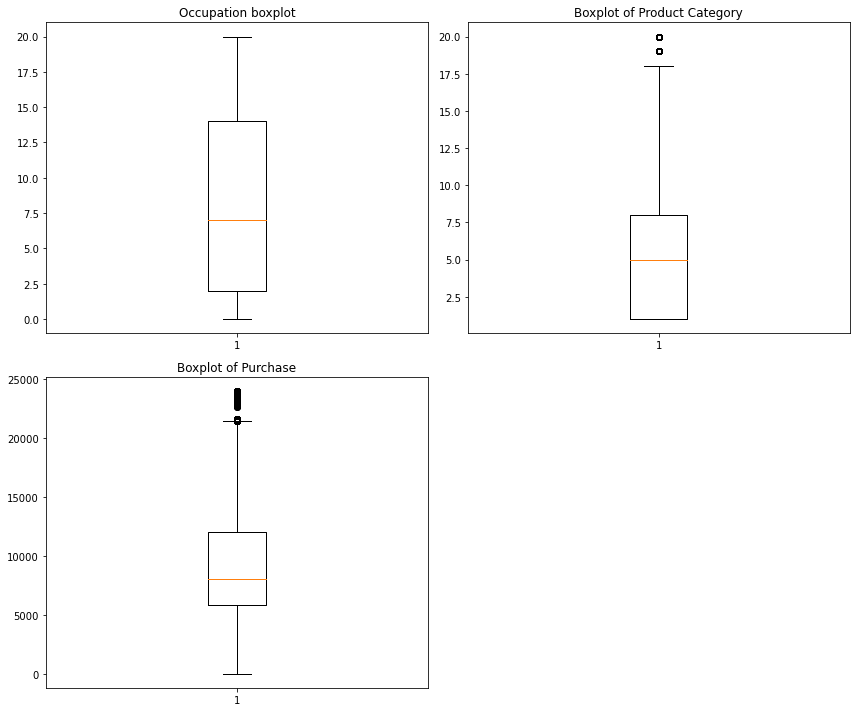

In [104]:
fig, ax = plt.subplots(2,2, figsize =(12, 10))
ax[0,0].boxplot(data['Occupation'])
ax[0,0].set_title('Occupation boxplot')

ax[0,1].boxplot(data.Product_Category)
ax[0,1].set_title('Boxplot of Product Category')

ax[1,0].boxplot(data.Purchase)
ax[1,0].set_title('Boxplot of Purchase')

ax[1,1].axis('off')



plt.tight_layout()
plt.show()

#### Purchase and product category has some outliers

In [105]:
category = data.City_Category.value_counts()
category

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Text(0, 0.5, 'Count')

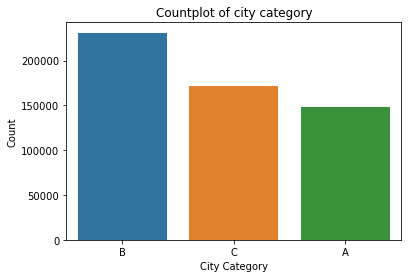

In [106]:
sns.barplot(category.index, category.values)
plt.title('Countplot of city category')
plt.xlabel('City Category')
plt.ylabel('Count')

#### City B has more purchase followed by city C and A

In [107]:
clipped_columns['Product_Category']

0          3.0
1          1.0
2         12.0
3         12.0
4          8.0
          ... 
550063    13.0
550064    13.0
550065    13.0
550066    13.0
550067    13.0
Name: Product_Category, Length: 550068, dtype: float64

In [108]:
product = data.Product_Category.value_counts()

Text(0, 0.5, 'Count')

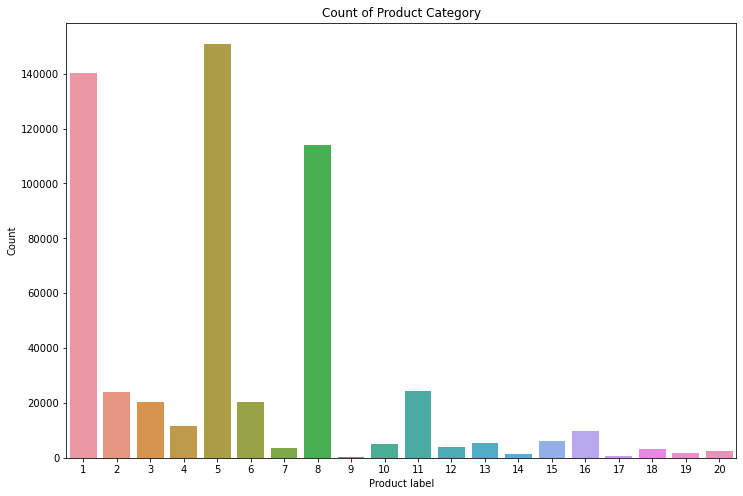

In [109]:
plt.figure(figsize = (12, 8))
sns.barplot(product.index, product.values)
plt.title('Count of Product Category')
plt.xlabel('Product label')
plt.ylabel('Count')

In [110]:
data['Marital_status'] = data.Marital_Status.map({0: 'Unmarried', 1: 'Married'})

In [111]:
marital_s = data.Marital_status.value_counts()

Text(0, 0.5, 'Count')

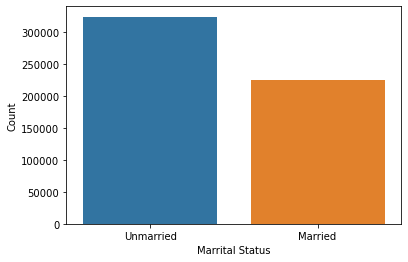

In [112]:
sns.barplot(marital_s.index, marital_s.values)
plt.xlabel('Marrital Status')
plt.ylabel('Count')

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

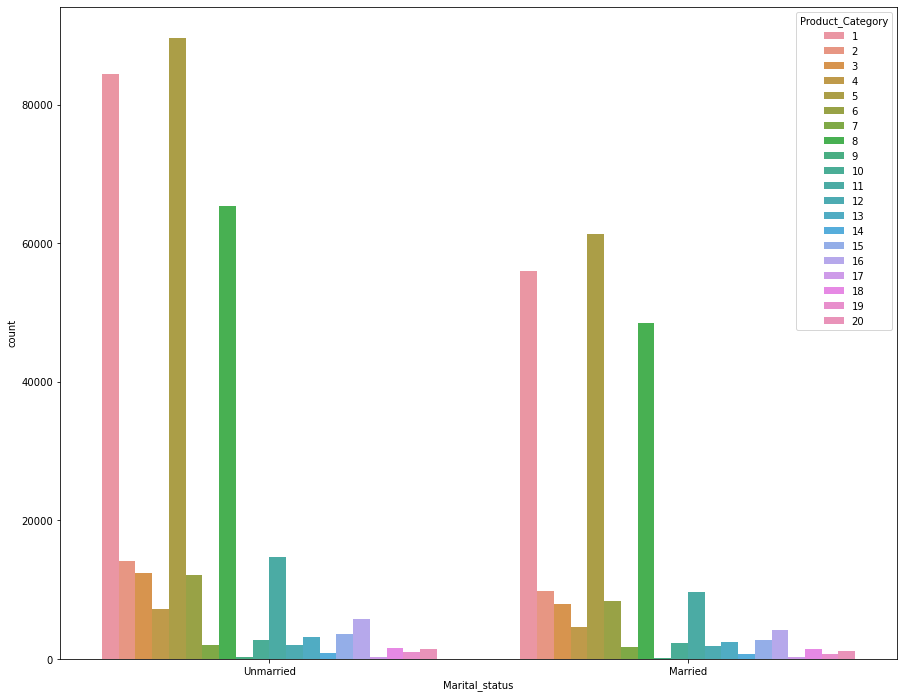

In [113]:
plt.figure(figsize = (15, 12))
sns.countplot(x= 'Marital_status', hue = 'Product_Category', data = data)

In [114]:
Current_city_year = data.Stay_In_Current_City_Years.value_counts()

Text(0, 0.5, 'Count')

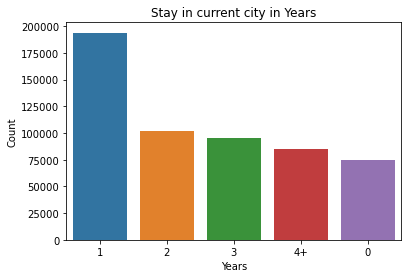

In [115]:
sns.barplot(Current_city_year.index, Current_city_year.values)
plt.title('Stay in current city in Years')
plt.xlabel('Years')
plt.ylabel('Count')

##### Those who are living in city for 1 year has more purchase history than others

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

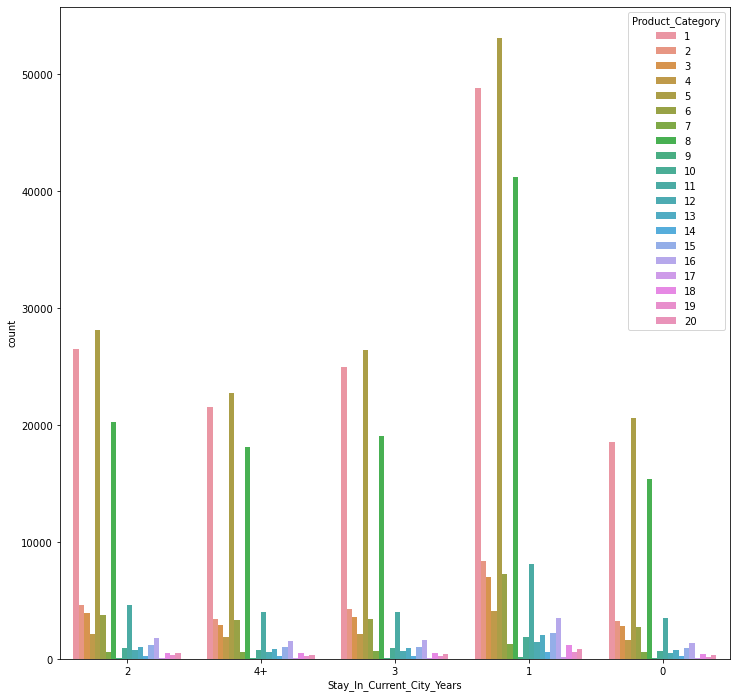

In [116]:
plt.figure(figsize = (12, 12))
sns.countplot('Stay_In_Current_City_Years', hue = 'Product_Category', data=data)

In [117]:
gender = data.Gender.value_counts()

Text(0.5, 0, 'Gender')

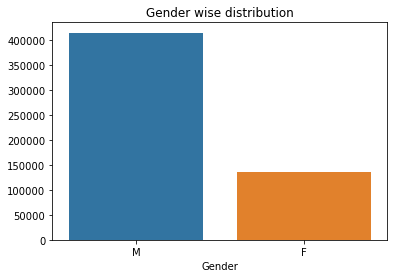

In [118]:
sns.barplot(gender.index, gender.values)
plt.title('Gender wise distribution')
plt.xlabel('Gender')

#### It seems Male Purchase history is more than female

#### Data between the 5 percentile and 95 percentile

In [119]:
columns_to_clip = ['Product_Category', 'Purchase']

clipped_columns = {}

for column in columns_to_clip:
    percentile_5_val = np.percentile(data[column], 5)
    percentile_95_val = np.percentile(data[column],95)
    clipped_column = np.clip(data[column], percentile_5_val, percentile_95_val)
    clipped_columns[column] = clipped_column

In [120]:
clipped_columns['Product_Category'].value_counts()

5.0     150933
1.0     140378
8.0     113925
13.0     31046
11.0     24287
2.0      23864
6.0      20466
3.0      20213
4.0      11753
10.0      5125
12.0      3947
7.0       3721
9.0        410
Name: Product_Category, dtype: int64

In [121]:
df = data.copy()

In [122]:
df['Product_Category'] = clipped_columns['Product_Category']
df['Purchase'] = clipped_columns['Purchase']

In [123]:
age = data.groupby('Age')['Product_Category'].count()

Text(0, 0.5, 'Count of Product Category')

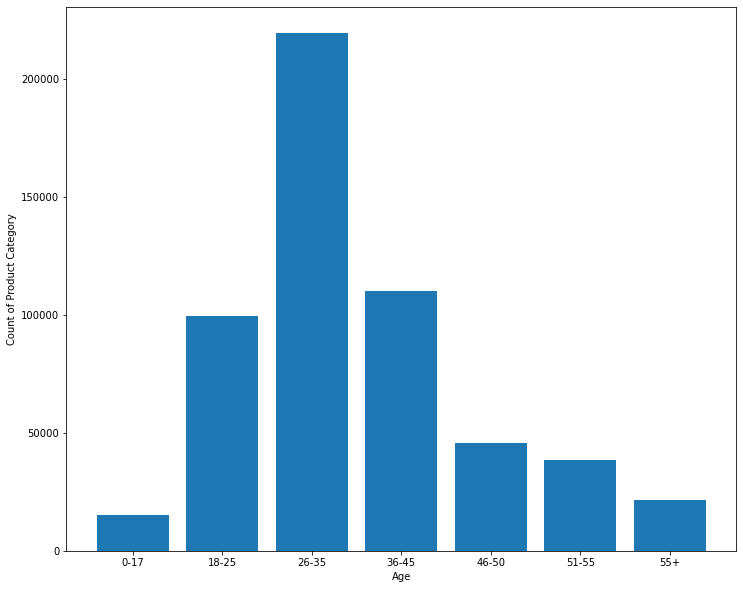

In [124]:
plt.figure(figsize = (12, 10))
plt.bar(age.index, age.values)
plt.xlabel('Age')
plt.ylabel('Count of Product Category')

#### Age group 26-35 orders more comarative to other age group

In [125]:
# Q 4: How does gender affect the amount spent?


def get_average_spent_per_gender(data):
  """Calculates the average amount spent per gender."""
  return data.groupby('Gender')['Purchase'].mean()

def bootstrap_ci(data, sample_size, n_bootstraps=50000):
  """Computes the confidence interval using bootstrapping."""
  gender_means = get_average_spent_per_gender(data)
  bootstrapped_means = []
  for i in range(n_bootstraps):
    sample = data.sample(sample_size, replace=True)
    bootstrapped_means.append(get_average_spent_per_gender(sample))

    bootstrapped_means_df = pd.DataFrame(bootstrapped_means)
  # Assuming a 95% confidence interval
    quantiles = bootstrapped_means_df.quantile([0.025, 0.975], axis=1)
    return quantiles.T

In [126]:
spent = get_average_spent_per_gender(df)
spent

Gender
F    8736.540266
M    9427.240997
Name: Purchase, dtype: float64

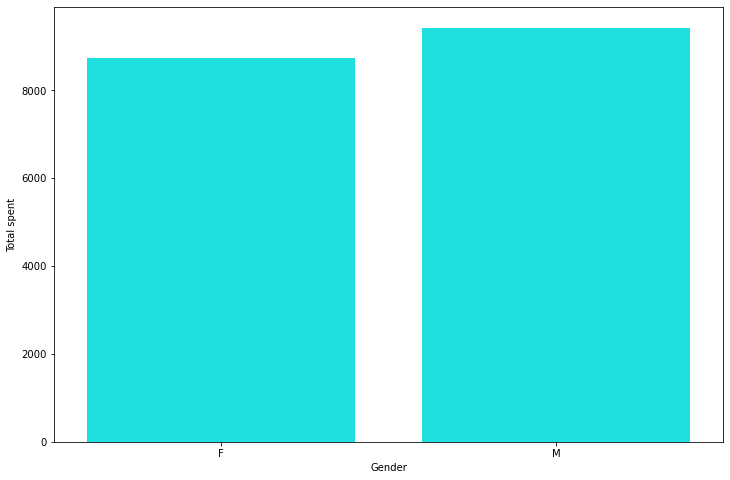

In [127]:
plt.figure(figsize= (12, 8))
sns.barplot(spent.index, spent.values, color = 'cyan')
plt.xlabel('Gender')
plt.ylabel('Total spent')
plt.show()

In [128]:
bootstrap_ci(data, len(data))

,0.025,0.975
Purchase,8764.625474,9427.446337


In [129]:
# C. I. for different sizes
sample_sizes = [300, 3000, 30000]
for sample_size in sample_sizes:
        sample_ci = bootstrap_ci(data.sample(sample_size, replace=True), sample_size)
        print(f"Confidence Interval for Sample Size {sample_size}:")
        print(sample_ci)

Confidence Interval for Sample Size 300:
                0.025        0.975
Purchase  8986.642475  9710.329238
Confidence Interval for Sample Size 3000:
                0.025        0.975
Purchase  8994.249609  9618.148917
Confidence Interval for Sample Size 30000:
                0.025        0.975
Purchase  8714.402089  9410.657681


### How does gender affect the amount spent?
Sample size 300: round(8975.46379-8720.402612,2) = 255.06
Sample size 3000: round(9568.542328-8874.368952,2) = 694.17
Sample size 30000: round(9453.213589 - 8658.600629, 2) = 794.61
This confirms  that a larger sample size leads to a larger confidence interval, reflecting a more precise estimate of the average purchase amount.
The confidence interval width varies across sample sizes for gender 


In [130]:
# Q5 How does Marital_Status affect the amount spent

def get_average_spent_per_marital_status(data):
  """Calculates the average amount spent per marital status."""
  return data.groupby('Marital_status')['Purchase'].mean()

def bootstrap_ci_1(data, sample_size, n_bootstraps=1000):
  """Computes the confidence interval using bootstrapping."""
  marital_means = get_average_spent_per_marital_status(data)
  bootstrapped_means = []
  for _ in range(n_bootstraps):
    sample = data.sample(sample_size, replace=True)
    bootstrapped_means.append(get_average_spent_per_marital_status(sample))

    bootstrapped_means_df = pd.DataFrame(bootstrapped_means)
  # Assuming a 95% confidence interval
    quantiles = bootstrapped_means_df.quantile([0.025, 0.975], axis=1)
    return quantiles.T

In [131]:
ms = get_average_spent_per_marital_status(data)
ms

Marital_status
Married      9261.174574
Unmarried    9265.907619
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='Marital_status'>

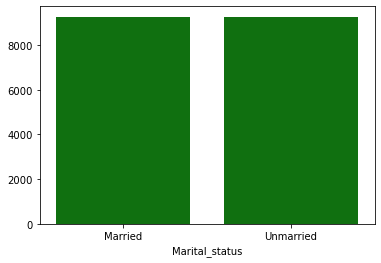

In [132]:
sns.barplot(ms.index, ms.values, color = 'green')

In [133]:
bootstrap_ci_1(data, len(data))

,0.025,0.975
Purchase,9256.720884,9283.345125


In [134]:
sample_size = [300, 3000, 30000]
for sample in sample_size:
        sample_ci = bootstrap_ci_1(data.sample(sample, replace=True), sample)
        print(f"Confidence Interval for Sample Size {sample}:")
        print(sample_ci)

Confidence Interval for Sample Size 300:
                0.025        0.975
Purchase  9539.995967  9679.967696
Confidence Interval for Sample Size 3000:
                0.025        0.975
Purchase  9005.888774  9205.681198
Confidence Interval for Sample Size 30000:
                0.025        0.975
Purchase  9225.509386  9231.802087


####  5. How does Marital_Status affect the amount spent?

Sample size 300: round(9723.721992-9035.276332, 2) = 688.45

Sample size 3000: round(9177.663179- 9118.895905, 2) = 58.77

Sample size 30000: round(9301.357872 - 9293.477086, 2) = 7.88

This confirms  that a larger sample size leads to a narrower confidence interval, reflecting a more precise estimate of the average purchase amount.

In [135]:
# Q6:  6. How does Age affect the amount spent?

def get_average_spent_per_age(data):
  """Calculates the average amount spent per age."""
  return data.groupby('Age')['Purchase'].mean()

def bootstrap_ci_2(data, sample_size, n_bootstraps=1000):
  """Computes the confidence interval using bootstrapping."""
  age_means = get_average_spent_per_age(data)
  bootstrapped_means = []
  for _ in range(n_bootstraps):
    sample = data.sample(sample_size, replace=True)
    bootstrapped_means.append(get_average_spent_per_age(sample))

    bootstrapped_means_df = pd.DataFrame(bootstrapped_means)
  # Assuming a 95% confidence interval
    quantiles = bootstrapped_means_df.quantile([0.025, 0.975], axis=1)
    return quantiles.T

In [136]:
Age = get_average_spent_per_age(data)
Age

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

Text(0, 0.5, 'Average Spent')

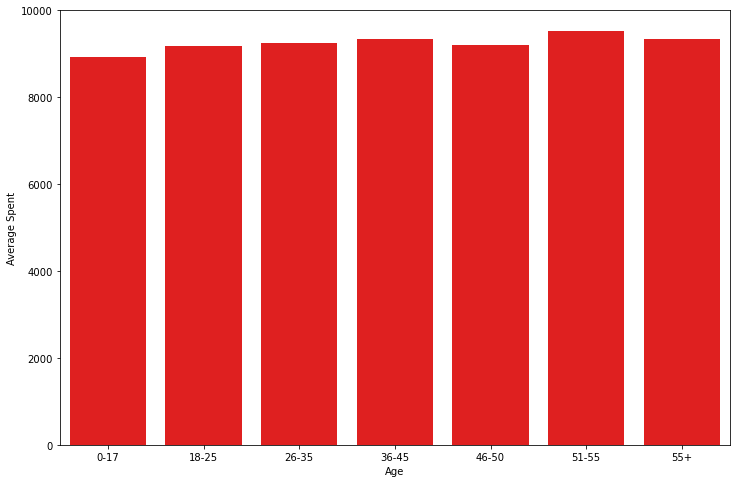

In [137]:
plt.figure(figsize = (12, 8))
sns.barplot(Age.index, Age.values, color = 'red')
plt.xlabel('Age')
plt.ylabel('Average Spent')

In [138]:
bootstrap_ci_2(data, len(data))

,0.025,0.975
Purchase,8908.251741,9507.729568


In [139]:
sample_size = [300, 3000, 30000]
for sample in sample_size:
        sample_ci = bootstrap_ci_2(data.sample(sample, replace=True), sample)
        print(f"Confidence Interval for Sample Size {sample}:")
        print(sample_ci)

Confidence Interval for Sample Size 300:
             0.025        0.975
Purchase  5336.975  10609.53604
Confidence Interval for Sample Size 3000:
                0.025         0.975
Purchase  8880.919758  10312.672085
Confidence Interval for Sample Size 30000:
               0.025        0.975
Purchase  8548.42964  9496.231911


##### How is the width of the confidence interval affected by the sample size?
 
1.Sample Size 300: Widest interval (10815.920186 - 6106.863441 ≈ 4709.06)

2.Sample Size 3000: Narrower interval (10086.178888 - 9125.641289 ≈ 960.54)

3.Sample Size 30000: Narrowest interval (9520.499949 - 8838.930224 ≈ 681.57)
 
This confirms the principle that a larger sample size leads to a narrower confidence interval, reflecting a more precise estimate of the average purchase amount.
#### Do the confidence intervals for different sample sizes overlap?
Larger sample sizes lead to narrower confidence intervals, indicating a more precise estimate of the average purchase amount.

#####  How does the sample size affect the shape of the distributions of the means?
Sample size primarily affects the spread of the distribution of means, not necessarily the underlying shape of the purchase amount data.

### Report
1.Overlapping CI for overall data suggests no significant difference in average spending between genders based on this sample.
Suggestion: Walmart could use gender-neutral marketing and analyze purchase behavior within genders for targeted promotions.
    
2. YES, the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. 
Suggestion:   Implement unified marketing strategies.Analyze spending behavior within each group for further insights.
    


### Recommondations

  1.Targeted marketing: Since the majority of transactions are made by males, it would be beneficial to tailor marketing          strategies to cater to their preferences and needs. This could include specific promotions, product offerings, or advertising campaigns designed to attract male customers.


2. Engage with new residents: As a significant portion of transactions  come from customers who have recently moved to the current city, it presents an opportunity to engage with these new residents. Targeted marketing, welcoming offers, and incentives for newcomers can help capture their loyalty and increase their spending.

3. Increase focus on single customers: Given that 59.05% of total revenue is generated by single customers, dedicating efforts to cater to their needs and preferences can help drive more sales. Understanding their motivations and targeting them with personalized offers can enhance their shopping experience and loyalty.

4. Location-based marketing: With a significant number of customers belonging to specific cities, tailoring marketing strategies to target these locations can lead to better results. Allocating resources, promotions, and events based on the customer concentration in each city can help drive sales

5. Optimize revenue from specific age groups: Since a majority of transactions are made by customers between the ages of 26 and 45, it is important to focus marketing efforts on this demographic. Offering products and services that align with their interests and values can maximize revenue generation.